# Importing Libraries

In [0]:
import numpy as np  #importing numerical python library for mathematical functions
import pandas as pd  #importing python data analysis library 

# Importing Data

<center> Dataset Explanation </center> <br>
This is dataset comprising of ratings given to musical instruments on the amazon website. <br>
The dataset comprises of user-id, item-id, ratings and timestamp. 

In [0]:
df=pd.read_csv('ratings_Musical_Instruments.csv',header=None, nrows=12000)  #Reading csv file of data
df.head()

,0,1,2,3
0,A1YS9MDZP93857,0006428320,3.0,1394496000
1,A3TS466QBAWB9D,0014072149,5.0,1370476800
2,A3BUDYITWUSIS7,0041291905,5.0,1381708800
3,A19K10Z0D2NTZK,0041913574,5.0,1285200000
4,A14X336IB4JD89,0201891859,1.0,1350432000


In [0]:
df.shape  #displaying shape of data stored in dataframe

(12000, 4)

# Getting unique number of users,items and ratings

In [0]:
n_users= df[0].unique().shape[0]   #Getting unique number of users from the dataframe
n_items = df[1].unique().shape[0]  #Getting unique number of items to which rating is given from the dataframe
n_rating = df[2].unique().shape[0] #Getting unique number of ratings from the dataframe

#Displaying number of unique users,items and ratings
print ('%i unique users' %n_users)
print ('%i unique items' %n_items)
print ('%i unique ratings' %n_rating)

10491 unique users
3183 unique items
5 unique ratings


# Creating ratings matrix

In [0]:
ratings=df.pivot(index=0, columns=1, values=2)  #Creating a ratings matrix comprising of users and items

In [0]:
ratings = ratings.fillna(0)  #Filling the matrix initially with 0 values

In [0]:
ratings = ratings.to_numpy()  #Converting to numpy array

In [0]:
ratings.shape  #Displaying shape of ratings numpy array

(10491, 3183)

# Calculating sparsity of ratings matrix

In [0]:
sparsity = float(len(ratings.nonzero()[0]))  #Getting number of non-zero ratings
sparsity /= (ratings.shape[0] * ratings.shape[1])  #Calculating the value of sparsity
sparsity *= 100  #Calculating sparsity percentage
print ('percentage of user-items that have a rating: {:.2f}%'.format(sparsity))  #Displaying percentage of user items having a rating

percentage of user-items that have a rating: 0.04%


# Splitting data for training and testing

In [0]:
def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)  #Defining an array for validation data
    train = ratings.copy()  #copying the ratings matrix to train 
    
    for user in np.arange(ratings.shape[0]):  #For loop for the number of users
        if len(ratings[user,:].nonzero()[0])>=35:  #35 seems to be best, it depends on sparsity of your user-item matrix
            val_ratings = np.random.choice(ratings[user, :].nonzero()[0], 
                                        size=15,  #15 seems to be optimal
                                        replace=False)  #Taking data for validation set from ratings
            train[user, val_ratings] = 0  
            validation[user, val_ratings] = ratings[user, val_ratings]
    
    return train, validation

In [0]:
train, val = train_test_split(ratings)

In [0]:
from numpy import linalg as LA  #importing linear algebra method from numpy library

# Prediction function

In [0]:
#P is latent user feature matrix
#Q is latent item feature matrix
def prediction(P,Q):
    return np.dot(P.T,Q)  #Returning the predicted matrix

# Defining a latent user and feature matrix

In [0]:
lmbda = 0.4 # Regularization parameter
k = 3 #Factor parameter
m, n = train.shape  # Number of users and items
n_epochs = 100  # Number of epochs
alpha=0.01  # Learning rate

P = 3 * np.random.rand(k,m) # Latent user feature matrix
Q = 3 * np.random.rand(k,n) # Latent movie feature matrix

In [0]:
train.shape  #Displaying shape of training data

(10491, 3183)

# Root mean square error function

<br>
<br>
<img src = "rmse.png">
<br>
<br>

In [0]:
#importing libraries for using inbuilt functions
from sklearn.metrics import mean_squared_error
from math import sqrt

#Function to find root-mean-square-error
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()   #Predicted values
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()  #Original values
    return sqrt(mean_squared_error(prediction, ground_truth))  #Returning error of predicted values from original values

# Performing Stochastic Gradient update

<center> Prediction error </center>
<img src = "error.png">
<center> Gradient update rule </center>
<img src = "sgd.png">

In [0]:
train_errors = []
val_errors = []

#Only consider items with ratings 
users,items = train.nonzero()    

#Iterating over 100 epochs to minimise the error by updating the parameters
for epoch in range(n_epochs):
    for u, i in zip(users,items):
        e = train[u, i] - prediction(P[:,u],Q[:,i])  # Calculate error for gradient update
        P[:,u] += alpha * ( e * Q[:,i] - lmbda * P[:,u]) # Update latent user feature matrix
        Q[:,i] += alpha * ( e * P[:,u] - lmbda * Q[:,i])  # Update latent item feature matrix
    
    train_rmse = rmse(prediction(P,Q),train)  #Getting error for training data
    val_rmse = rmse(prediction(P,Q),val)  #Getting error for validation data
    train_errors.append(train_rmse)  #Storing value of training errors
    val_errors.append(val_rmse)  #Storing value of validation errors

# Plotting Training and Validation Loss Curve

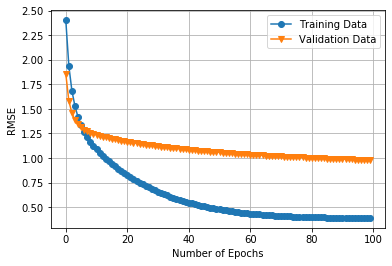

In [0]:
#importing library for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(n_epochs), train_errors, marker='o', label='Training Data');  #For training errors
plt.plot(range(n_epochs), val_errors, marker='v', label='Validation Data');  #For validation errors
plt.xlabel('Number of Epochs');  # x-label
plt.ylabel('RMSE');  # y-label
plt.legend()
plt.grid()
plt.show()  #plot

# Calling Prediction function

In [0]:
SGD_prediction=prediction(P,Q)  #calling the function for prediction

In [0]:
estimation= SGD_prediction[val.nonzero()]  #Getting estimated value
ground_truth = val[val.nonzero()]  #Getting original value
results=pd.DataFrame({'prediction':estimation, 'actual rating':ground_truth})  #Creating a dataframe for prediction and original values

# Displaying predicted matrix

In [0]:
results.head()  #Displaying results

,prediction,actual rating
0,4.140077,4.0
1,5.483732,5.0
2,4.725747,4.0
3,3.750554,4.0
4,5.229607,5.0
